## Machine Learning
#### Predict Sales For Retail Stores
###### Aditya Hajare | https://www.linkedin.com/in/aditya-hajare

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import re

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

def rename_column(data):
    cols = []

    for col_name in data.columns:
        explode = re.findall('[A-Z][^A-Z]*', col_name)

        if explode:
            rename = ""

            for index,substr in enumerate(explode):
                if index!=0:
                    rename+="_"+substr.lower()
                else:
                    rename = substr.lower()

            cols.append(rename)

    data.columns = cols

    return data

store_data = pd.read_csv("store.csv")
sales_data = pd.read_csv("sales.csv")

sales_data = rename_column(sales_data)
store_data = rename_column(store_data)

merged_data = pd.merge(sales_data, store_data, on = "store")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

## There could be "n" number of customers for later dates and because of that "customers" column should not be passed as an input to model for this analysis. Deleting "customers" column.

In [193]:
delete_column = ["customers"]
merged_data.drop(columns = delete_column, inplace = True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   open                          1017209 non-null  int64  
 5   promo                         1017209 non-null  int64  
 6   state_holiday                 1017209 non-null  object 
 7   school_holiday                1017209 non-null  int64  
 8   store_type                    1017209 non-null  object 
 9   assortment                    1017209 non-null  object 
 10  competition_distance          1014567 non-null  float64
 11  competition_open_since_month  693861 non-null   float64
 12  competition_open_since_year 

## Filling missing values and converting non-numeric values to numeric values.

In [194]:

merged_data['competition_distance'].fillna(method ='pad', inplace = True)
merged_data['competition_open_since_month'].fillna(method = 'pad', inplace = True)
merged_data['competition_open_since_year'].fillna(method = 'pad', inplace = True)
merged_data['promo2_since_week'].fillna(0, inplace = True)
merged_data['promo2_since_year'].fillna(0, inplace = True)
merged_data['promo_interval'].fillna('0', inplace = True)

merged_data['promo_interval'] = merged_data['promo_interval'].astype(str)
merged_data['state_holiday'] = merged_data['state_holiday'].astype(str)

merged_data = pd.get_dummies(merged_data, prefix = ["state_holiday"], columns = ["state_holiday"])
merged_data = pd.get_dummies(merged_data, prefix = ["promo_interval"], columns = ["promo_interval"])


from sklearn.preprocessing import LabelEncoder

def encode_feat(data):
    label_encoder = LabelEncoder()
    label_encoder.fit(data)
    return label_encoder.transform(data)

merged_data['store_type'] = encode_feat(merged_data['store_type'])
merged_data['assortment'] = encode_feat(merged_data['assortment'])

In [195]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   store                            1017209 non-null  int64  
 1   day_of_week                      1017209 non-null  int64  
 2   sales                            1017209 non-null  int64  
 3   open                             1017209 non-null  int64  
 4   promo                            1017209 non-null  int64  
 5   school_holiday                   1017209 non-null  int64  
 6   store_type                       1017209 non-null  int64  
 7   assortment                       1017209 non-null  int64  
 8   competition_distance             1017209 non-null  float64
 9   competition_open_since_month     1017209 non-null  float64
 10  competition_open_since_year      1017209 non-null  float64
 11  promo2                           1017209 non-null 

## Get "year", "month" and "day_of_month" from "date" column and then drop "date" column since it is no longer required.

In [196]:
merged_data["date"] = pd.to_datetime(merged_data["date"])
merged_data["year"] = merged_data["date"].dt.year
merged_data["month"] = merged_data["date"].dt.month
merged_data["day_of_month"] = merged_data["date"].dt.day

merged_data.drop(columns = 'date', inplace = True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   store                            1017209 non-null  int64  
 1   day_of_week                      1017209 non-null  int64  
 2   sales                            1017209 non-null  int64  
 3   open                             1017209 non-null  int64  
 4   promo                            1017209 non-null  int64  
 5   school_holiday                   1017209 non-null  int64  
 6   store_type                       1017209 non-null  int64  
 7   assortment                       1017209 non-null  int64  
 8   competition_distance             1017209 non-null  float64
 9   competition_open_since_month     1017209 non-null  float64
 10  competition_open_since_year      1017209 non-null  float64
 11  promo2                           1017209 non-null 

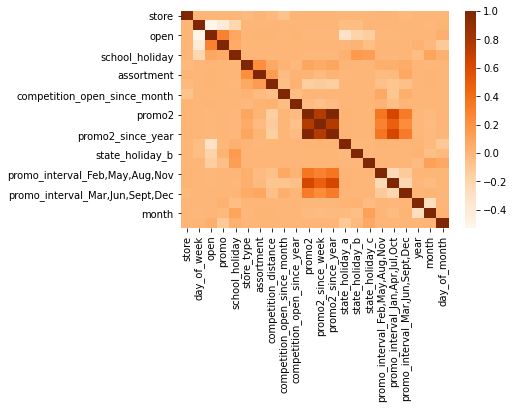

In [197]:
y_cols = ['sales']
x_cols = list(joined_data.columns)
x_cols.remove('sales')
x_cols.remove('state_holiday_0')
x_cols.remove('promo_interval_0')

sns.heatmap(joined_data[x_cols].corr(), cmap = 'Oranges')

## Splitting merged data into training (80%) and testing (20%). Using "random_state = 1".

In [198]:
X = merged_data[x_cols].copy()
y = merged_data[y_cols].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

## Standardizing all input columns using "StandardScaler()" function from "sklearn".
## Using "statsmodels" package, identify if the coefficients of the input variables is significant or not. Make sure to re-build the model until only significant columns are present in the model


In [199]:
from sklearn.preprocessing import StandardScaler


X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

continous_cols = ['competition_distance']
scaler = StandardScaler()
scaler.fit(X_train['competition_distance'].values.reshape(-1,1))
# print(X_test.columns)
X_train_scaled['competition_distance'] = scaler.transform(X_train['competition_distance'].values.reshape(-1, 1))
X_test_scaled['competition_distance'] = scaler.transform(X_test['competition_distance'].values.reshape(-1, 1))

#adding constant to the scaled variables
X_train_scaled_constant = sm.add_constant(X_train_scaled)
X_test_scaled_constant = sm.add_constant(X_test_scaled)

#fitting the linear regression model using sm.OLS
model = sm.OLS(y_train,X_train_scaled_constant).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                 4.861e+04
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:02:20   Log-Likelihood:            -7.5422e+06
No. Observations:              813767   AIC:                         1.508e+07
Df Residuals:                  813745   BIC:                         1.508e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Building linear regression model using relevantly influencing columns.

In [200]:
lr = LinearRegression()
lr.fit(X_train_scaled_constant.drop(columns = []), y_train)

LinearRegression()

## Printing "RMSE" and "R2" square value.

In [201]:
y_pred = lr.predict(X_test_scaled_constant.drop(columns = []))

print("R2: {r2}".format(r2 = r2_score(y_test, y_pred)))
print("RMSE: {rmse}".format(rmse = np.sqrt(mean_squared_error(y_test, y_pred))))

R2: 0.5570800681703331
RMSE: 2562.7080162715165


## Plotting the coefficients of the input variables using the bar chart.

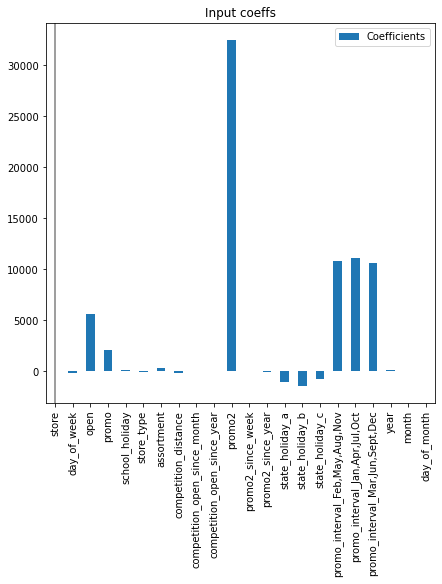

In [202]:

feature_names = np.array(x_cols)

coefs = pd.DataFrame(
    lr.coef_[0][1:].reshape(-1, 1),
    columns = ['Coefficients'], index = feature_names
    )

# print(x_cols.shape())

coefs.plot(kind = 'bar', figsize = (9, 7))
plt.title('Input coeffs')
plt.axvline(x = 0, color = '.5')
plt.subplots_adjust(left = 0.3)